In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu_k = 0.100
theta = 10.7
L = 2.0

dtor = np.pi/180.0
rtod = 180.0/np.pi

xb = 0.10
yb = 0.10

m = 0.500 # mass of object in kg
g = 9.80 # acceleration of gravity in m/s^2

y0 = L*np.sin(theta*dtor)
x0 = L*np.cos(theta*dtor)

xi = (yb/2.0)*np.sin(theta*dtor)
yi = y0 + (yb/2.0)*np.cos(theta*dtor)

xf = x0 + (yb/2.0)*np.sin(theta*dtor)
yf = (yb/2.0)*np.cos(theta*dtor)

In [3]:
axp = g*(np.sin(theta*dtor)-mu_k*np.cos(theta*dtor))
ax = axp*np.cos(theta*dtor)
ay = -axp*np.sin(theta*dtor)

delta_x = xf - xi
delta_y = yf - yi

t_max = np.sqrt((2.0*L)/axp) # maximum time of simulation.

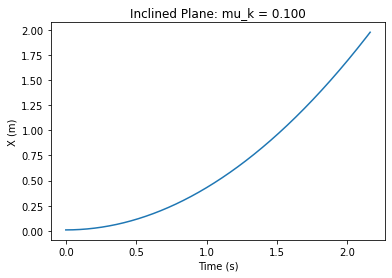

In [4]:
nsteps = 2001
debug = False

xpos = np.zeros(nsteps)
ypos = np.zeros(nsteps)

vx = np.zeros(nsteps)
vy = np.zeros(nsteps)

t = np.zeros(nsteps)

xpos_old = xi
ypos_old = yi
xpos[0] = xi
ypos[0] = yi

vx[0] = 0.0
vy[0] = 0.0

for i in range(1,nsteps):
    dt = t_max/(nsteps-1)
    t[i] = i*dt

    vx[i] = vx[i-1] + ax*dt
    vy[i] = vy[i-1] + ay*dt
    
    dx = vx[i-1]*dt + 0.5*ax*dt**2
    dy = vy[i-1]*dt + 0.5*ay*dt**2
        
    xpos[i] = xpos[i-1] + dx
    ypos[i] = ypos[i-1] + dy
        
plt.plot(t,xpos)
plt.xlabel('Time (s)')
plt.ylabel('X (m)')
plt.title('Inclined Plane: mu_k = 0.100')
plt.show()

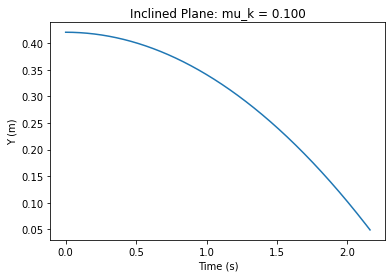

In [5]:
plt.plot(t,ypos)
plt.xlabel('Time (s)')
plt.ylabel('Y (m)')
plt.title('Inclined Plane: mu_k = 0.100')
plt.show()

In [6]:
print (t[-1])
for i in range(30,60):
    FPS = i
    framesNum = int(FPS*t[-1])
    if ((nsteps-1)%framesNum==0):
        break
        
print ("n, FPS, framesNum = ", nsteps,FPS,framesNum)

2.160966255191439
n, FPS, framesNum =  2001 58 125


In [8]:
from matplotlib import animation
from matplotlib.patches import Rectangle, Ellipse
from IPython.display import HTML
from matplotlib import patches
from matplotlib.collections import PatchCollection

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(xlim=(-0.1, 2.1), ylim=(-0.1, 1.05))
ax.axis('on')

#fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
#plt.plot(xpos,ypos)

plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.title('Inclined Plane: mu_k = 0.100')

#plt.show()

line1, = ax.plot([], [], 'b-', lw=2)
line2, = ax.plot([], [], 'b-', lw=2)
line3, = ax.plot([], [], 'b-', lw=2)
line4, = ax.plot([], [], 'b-', lw=2)
line5, = ax.plot([], [], 'r-', lw=2)

#airpods = Rectangle((xpos[0]-xl/2.0, ypos[0]-yl/2.0),xl,yl,facecolor="blue",fill=True)
ball = Ellipse((xpos[0], ypos[0]),0.01,0.01,facecolor = 'red',fill=True)
phi = 180.0/np.pi*np.arctan(yb/xb)
print (phi)

# Define the different elements in the animation
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    #ax.add_patch(airpods)
    ax.add_patch(ball)
    return line1, line2, line3, line4, line5, ball

# Animation function. This is called sequentially.
def animate(j):
    i = (j+1)*int((nsteps-1)/framesNum)-5
    if debug: i,j,print (xpos[i],ypos[i])
    psil = phi + theta
    psir = phi - theta
    diag = np.sqrt(xb**2+yb**2)/2.0
    
    thisx = [xpos[i]-diag*np.cos(psil*np.pi/180.0), xpos[i]+diag*np.cos(psir*np.pi/180.0)]
    thisy = [ypos[i]+diag*np.sin(psil*np.pi/180.0), ypos[i]+diag*np.sin(psir*np.pi/180.0)]
    line1.set_data(thisx, thisy)
    
    thisx = [xpos[i]-diag*np.cos(psir*np.pi/180.0), xpos[i]+diag*np.cos(psil*np.pi/180.0)]
    thisy = [ypos[i]-diag*np.sin(psir*np.pi/180.0), ypos[i]-diag*np.sin(psil*np.pi/180.0)]
    line2.set_data(thisx, thisy)
    
    thisx = [xpos[i]-diag*np.cos(psil*np.pi/180.0), xpos[i]-diag*np.cos(psir*np.pi/180.0)]
    thisy = [ypos[i]+diag*np.sin(psil*np.pi/180.0), ypos[i]-diag*np.sin(psir*np.pi/180.0)]
    line3.set_data(thisx, thisy)
    
    thisx = [xpos[i]+diag*np.cos(psir*np.pi/180.0), xpos[i]+diag*np.cos(psil*np.pi/180.0)]
    thisy = [ypos[i]+diag*np.sin(psir*np.pi/180.0), ypos[i]-diag*np.sin(psil*np.pi/180.0)]
    line4.set_data(thisx, thisy)
    
    thisx = [0,L*np.cos(theta*np.pi/180.0)]
    thisy = [L*np.sin(theta*np.pi/180.0),0]
    line5.set_data(thisx, thisy)
    
    #airpods.set_height = yl
    #airpods.set_width = xl
    #airpods.set_xy = (xpos[i]-xl/2.0, ypos[i]-yl/2.0)
    #airpods._angle = theta_step[i]
    ball.center = (xpos[i], ypos[i])
    
    return line1, line2, line3, line4, line5, ball

# Create animation

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=framesNum, interval=1200/FPS, repeat=False)
#anim.save('A5Q3.mp4')
plt.close(anim._fig)

# Display the animation
HTML(anim.to_html5_video())

45.0
